In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df =pd.read_csv('/content/drive/MyDrive/FuelConsumptionCo2.csv')

In [ ]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
  #RESUMO DO DATA SET
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Selecionar apenas as features do motor e co2


In [ ]:
motores =df [['ENGINESIZE']]
co2=df [['CO2EMISSIONS']]
motores.head()

,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5


Dividir o dataset em dados de treinamento e dados de teste


In [ ]:
motores_treino,motores_test,co2_treino,co2_teste=train_test_split(motores ,co2,test_size=0.2,random_state=42)
print(type(motores_treino))

<class 'pandas.core.frame.DataFrame'>


Exibir correlação entre as features do data set de treinamento

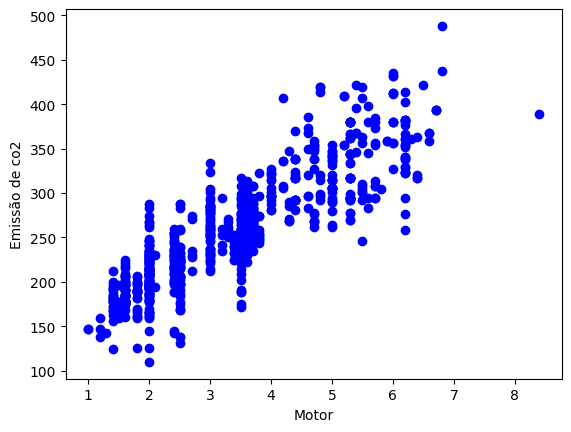

In [ ]:
plt.scatter(motores_treino,co2_treino,color='blue')
plt.xlabel('Motor')
plt.ylabel('Emissão de co2')
plt.show()

Treinando o modelo de regressão linear

In [ ]:
#Criando um modelo de regressão linear
modelo=linear_model.LinearRegression()
#Treinando o modelo
modelo.fit(motores_treino,co2_treino)

LinearRegression()

Exibir os coeficientes (A e B)

In [ ]:
print('(A) Intercepto',modelo.intercept_)
print('(B) Inclinação',modelo.coef_)

(A) Intercepto [126.28970217]
(B) Inclinação [[38.99297872]]


Exibindo a nossa reta de regressão no dataset de treino


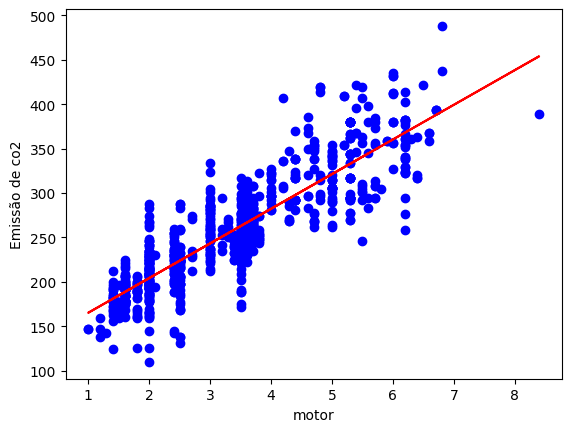

In [ ]:
plt.scatter(motores_treino, co2_treino,color='blue')
plt.plot(motores_treino, modelo.coef_[0][0]*motores_treino+modelo.intercept_[0],'-r')
plt.xlabel('motor')
plt.ylabel('Emissão de co2')
plt.show()

# Executando o modelo no dataset de teste

In [ ]:
predicoesco2=modelo.predict(motores_test)


  Exibindo a reta de regressão no dataset de teste

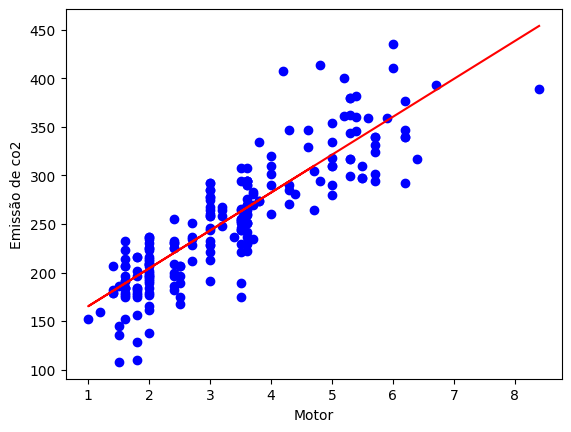

In [ ]:
plt.scatter(motores_test,co2_teste,color='blue')
plt.plot(motores_test,modelo.coef_[0][0]*motores_test+modelo.intercept_[0],'r')
plt.ylabel('Emissão de co2')
plt.xlabel('Motor')
plt.show()

Avaliar o modelo

In [ ]:
print('Soma dos erros ao quadrado(SSE): %2.f'%np.sum((predicoesco2-co2_teste)**2))
print('Erro quadrático médio (MSE): %2.f'%mean_squared_error(co2_teste,predicoesco2))
print('Raiz do erro quadrático médio (RMSE): %2.f'%sqrt(mean_squared_error(co2_teste,predicoesco2)))
print('R2-score: %.2f'%r2_score(predicoesco2,co2_teste))

Soma dos erros ao quadrado(SSE): 210991
Erro quadrático médio (MSE): 986
Raiz do erro quadrático médio (RMSE): 31
R2-score: 0.68


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
<ipython-input-29-c18aead1b0dd>:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Soma dos erros ao quadrado(SSE): %2.f'%np.sum((predicoesco2-co2_teste)**2))
